<a href="https://colab.research.google.com/github/simulate111/mini-project-2-Abo/blob/main/MIniProject2Reza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace 'your_path' with the actual path to the file if it's not in the current working directory
file_path = 'https://raw.githubusercontent.com/simulate111/mini-project-2-Abo/main/Sentiment140.tenPercent.sample.tweets.tsv'

# Read the TSV file into a Pandas DataFrame without defining column names
df = pd.read_csv(file_path, sep='\t', header=0)

# Display the first few rows of the DataFrame
display(df.head())

# Display a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()


,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [2]:
# Display unique values and their counts for the 'sentiment_label' column
sentiment_label_counts = df['sentiment_label'].value_counts()

# Display the result
print("Unique Sentiment Labels and Counts:")
print(sentiment_label_counts)


Unique Sentiment Labels and Counts:
4    80000
0    80000
Name: sentiment_label, dtype: int64


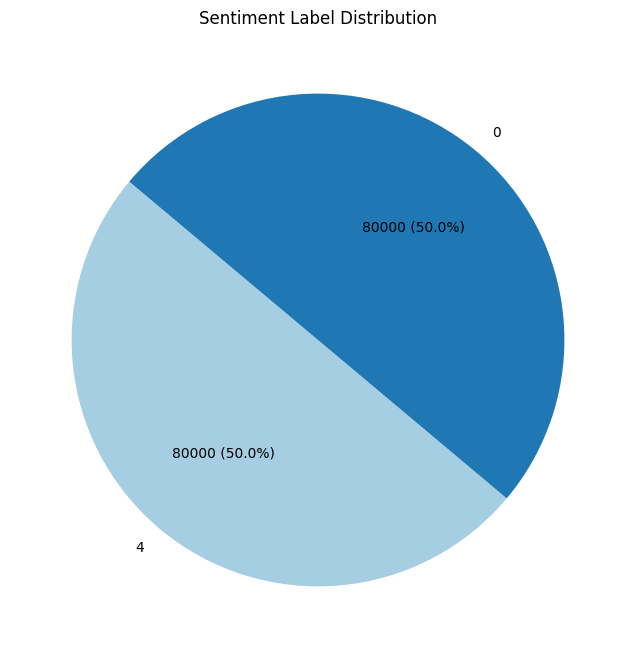

In [3]:
import matplotlib.pyplot as plt

# Get unique values and their counts for the 'sentiment_label' column
sentiment_label_counts = df['sentiment_label'].value_counts()

# Plotting the pie chart with labels
plt.figure(figsize=(8, 8))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sentiment_label_counts.sum() / 100, p),
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sentiment Label Distribution')
plt.show()


In [4]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the result
print("Missing Values:")
print(missing_values)


Missing Values:
sentiment_label    0
tweet_text         0
dtype: int64


In [5]:
# Check for missing values in the 'sentiment_label' column
missing_values_sentiment = df['sentiment_label'].isnull().sum()

# Display the result
print("Missing Values in 'sentiment_label' column:", missing_values_sentiment)


Missing Values in 'sentiment_label' column: 0


In [6]:
# Check text lengths
df['text_length'] = df['tweet_text'].apply(len)
print("Text Length Summary:")
print(df['text_length'].describe())


Text Length Summary:
count    160000.000000
mean         74.113481
std          36.440383
min           6.000000
25%          44.000000
50%          69.000000
75%         104.000000
max         186.000000
Name: text_length, dtype: float64


In [7]:
# Replace values in the 'sentiment_label' column
df['sentiment_label'] = df['sentiment_label'].replace({4: 1})

# Display the first few rows to verify the changes
display(df.head())


,sentiment_label,tweet_text,text_length
0,1,"@elephantbird Hey dear, Happy Friday to You A...",85
1,1,Ughhh layin downnnn Waiting for zeina to co...,58
2,0,"@greeniebach I reckon he'll play, even if he's...",116
3,0,@vaLewee I know! Saw it on the news!,37
4,0,very sad that http://www.fabchannel.com/ has c...,118


In [8]:
import re

# Function to clean tweets
def clean_tweet(tweet):
    # Remove mentions (@username)
    tweet = re.sub(r'@[\w]+', '', tweet)

    # Remove links (http/https)
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove special characters
    tweet = re.sub(r'[^A-Za-z0-9]+', ' ', tweet)

    # Remove extra spaces
    tweet = ' '.join(tweet.split())

    return tweet

# Apply the clean_tweet function to the 'tweet_text' column
df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)

# Display the first few rows with cleaned tweets
display(df[['tweet_text', 'cleaned_tweet']].head())


,tweet_text,cleaned_tweet
0,"@elephantbird Hey dear, Happy Friday to You A...",Hey dear Happy Friday to You Already had your ...
1,Ughhh layin downnnn Waiting for zeina to co...,Ughhh layin downnnn Waiting for zeina to cook ...
2,"@greeniebach I reckon he'll play, even if he's...",I reckon he ll play even if he s not 100 but i...
3,@vaLewee I know! Saw it on the news!,I know Saw it on the news
4,very sad that http://www.fabchannel.com/ has c...,very sad that has closed down One of the few w...


In [9]:
# Check for null or empty content in the 'cleaned_tweet' column
null_cleaned_tweets = df[df['cleaned_tweet'].isnull() | (df['cleaned_tweet'] == '')]

# Display summary information about the rows with null or empty cleaned tweets
print("Summary of Null or Empty Cleaned Tweets:")
print(null_cleaned_tweets.info())


Summary of Null or Empty Cleaned Tweets:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 183 to 159158
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment_label  330 non-null    int64 
 1   tweet_text       330 non-null    object
 2   text_length      330 non-null    int64 
 3   cleaned_tweet    330 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.9+ KB
None


In [10]:
print(f"Null values: \n\n{df.isna().sum()}")


Null values: 

sentiment_label    0
tweet_text         0
text_length        0
cleaned_tweet      0
dtype: int64


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming 'cleaned_tweet' is the column containing your tokenized sequences
tokenized_sequences = df['cleaned_tweet']

# Create a tokenizer and fit on the tokenized sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_sequences)

# Convert text data to sequences of integers
sequences = tokenizer.texts_to_sequences(tokenized_sequences)

# Print the first few sequences
print("Sample Sequences:", sequences[:5])


Sample Sequences: [[150, 636, 120, 322, 2, 8, 206, 66, 45, 1748, 12, 2193, 10, 358], [2194, 3973, 20681, 298, 10, 29220, 2, 1155, 523], [1, 3715, 87, 80, 305, 156, 71, 87, 12, 26, 577, 21, 1, 58, 263, 7, 203, 14, 24, 3, 262, 380, 147], [1, 58, 274, 7, 15, 3, 459], [123, 113, 16, 104, 961, 158, 57, 13, 3, 310, 1019, 3785, 16, 1, 124, 475, 10, 135, 235, 477]]


In [12]:
from sklearn.model_selection import train_test_split

# Assuming 'sequences' is your list of sequences and 'sentiment_label' is your target
X = sequences
y = df['sentiment_label']  # Use the correct target column

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", len(X_train))
print("Shape of X_test:", len(X_test))
print("Shape of y_train:", len(y_train))
print("Shape of y_test:", len(y_test))


Shape of X_train: 128000
Shape of X_test: 32000
Shape of y_train: 128000
Shape of y_test: 32000


### Tokienization

In [13]:


# Assuming 'cleaned_tweet' is the column containing your tokenized sequences
tokenized_sequences = df['cleaned_tweet']

# Create a tokenizer and fit on the tokenized sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_sequences)

# Print the length of the word index
print(f"Word index length: {len(tokenizer.word_index)}")

# Print some words from the word index
some_words = list(tokenizer.word_index.keys())[:10]
print(f"Some words: {some_words}")


Word index length: 70393
Some words: ['i', 'to', 'the', 'a', 'my', 'and', 'it', 'you', 'is', 'for']


In [14]:
# Assuming 'cleaned_tweet' is the column containing your tokenized sequences
tokenized_sequences = df['cleaned_tweet']

# Calculate the length of each tokenized sequence and find the maximum
max_token_length = max(len(sequence) for sequence in tokenized_sequences)

# Display the result
print(f"Maximum Token Length: {max_token_length}")


Maximum Token Length: 169


In [15]:
# Assuming 'cleaned_tweet' is the column containing your tokenized sequences as strings
tokenized_sequences = df['cleaned_tweet']

# Split each string into tokens and calculate the maximum token length
max_token_length = max(len(sequence.split()) for sequence in tokenized_sequences)

# Display the result
print(f"Maximum Token Length: {max_token_length}")


Maximum Token Length: 46


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming 'cleaned_tweet' is the column containing your text data
texts = df['cleaned_tweet']

# Create a tokenizer and fit on the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Display the first few sequences
print("Original Texts:")
print(texts.head())
print("\nSequences:")
print(sequences[:5])


Original Texts:
0    Hey dear Happy Friday to You Already had your ...
1    Ughhh layin downnnn Waiting for zeina to cook ...
2    I reckon he ll play even if he s not 100 but i...
3                            I know Saw it on the news
4    very sad that has closed down One of the few w...
Name: cleaned_tweet, dtype: object

Sequences:
[[150, 636, 120, 322, 2, 8, 206, 66, 45, 1748, 12, 2193, 10, 358], [2194, 3973, 20681, 298, 10, 29220, 2, 1155, 523], [1, 3715, 87, 80, 305, 156, 71, 87, 12, 26, 577, 21, 1, 58, 263, 7, 203, 14, 24, 3, 262, 380, 147], [1, 58, 274, 7, 15, 3, 459], [123, 113, 16, 104, 961, 158, 57, 13, 3, 310, 1019, 3785, 16, 1, 124, 475, 10, 135, 235, 477]]


### NEural network

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from zipfile import ZipFile
import urllib.request
import os

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are defined from the previous steps
# and 'tokenizer' is your Tokenizer instance

# Pad sequences to make them of equal length
max_sequence_length = max(len(sequence) for sequence in X_train)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_sequence_length)

# Define the URL of the GloVe Twitter embeddings ZIP file
glove_url = 'https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip'

# Create a directory to store the downloaded and extracted files
download_dir = 'glove_twitter'
os.makedirs(download_dir, exist_ok=True)

# Download the GloVe Twitter embeddings ZIP file
zip_file_path = os.path.join(download_dir, 'glove.twitter.27B.zip')
urllib.request.urlretrieve(glove_url, zip_file_path)

# Extract the contents of the ZIP file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)

# Provide the path to the extracted GloVe Twitter file
glove_embeddings_path = os.path.join(download_dir, 'glove.twitter.27B.200d.txt')

# Load the pre-trained GloVe Twitter embeddings
embeddings_index = {}
with open(glove_embeddings_path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Continue with the rest of your code

In [18]:
# Create an embedding matrix using GloVe embeddings
embedding_dim = len(embeddings_index.get('a'))  # Dimensionality of the GloVe embeddings
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Create a simple neural network model with GloVe embeddings
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the training history
history = model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))


Epoch 1/5
4000/4000 [==============================] - 19s 4ms/step - loss: 0.5102 - accuracy: 0.7458 - val_loss: 0.4915 - val_accuracy: 0.7572
Epoch 2/5
4000/4000 [==============================] - 22s 5ms/step - loss: 0.4578 - accuracy: 0.7805 - val_loss: 0.4872 - val_accuracy: 0.7609
Epoch 3/5
4000/4000 [==============================] - 17s 4ms/step - loss: 0.4145 - accuracy: 0.8070 - val_loss: 0.5066 - val_accuracy: 0.7552
Epoch 4/5
4000/4000 [==============================] - 15s 4ms/step - loss: 0.3669 - accuracy: 0.8342 - val_loss: 0.5421 - val_accuracy: 0.7525
Epoch 5/5
4000/4000 [==============================] - 17s 4ms/step - loss: 0.3234 - accuracy: 0.8567 - val_loss: 0.5851 - val_accuracy: 0.7473


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 200)           14078800  
                                                                 
 flatten (Flatten)           (None, 9200)              0         
                                                                 
 dense (Dense)               (None, 32)                294432    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14373265 (54.83 MB)
Trainable params: 294465 (1.12 MB)
Non-trainable params: 14078800 (53.71 MB)
_________________________________________________________________


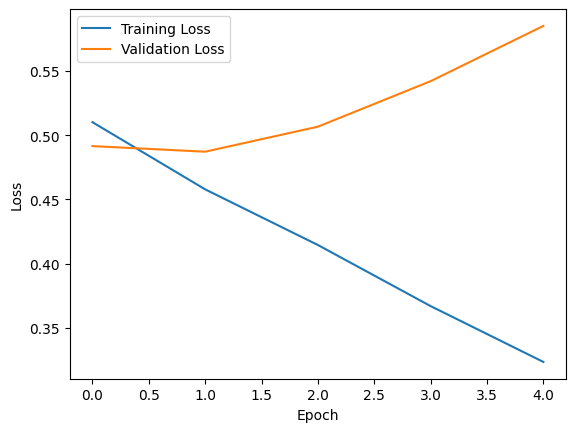

In [20]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Convolutional Neural Network (CNN):

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Create an embedding matrix using GloVe embeddings
embedding_dim = len(embeddings_index.get('a'))  # Dimensionality of the GloVe embeddings
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Create a simple CNN model with GloVe embeddings
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


Epoch 1/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.4686 - accuracy: 0.7742 - val_loss: 0.4385 - val_accuracy: 0.7932
Epoch 2/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.4153 - accuracy: 0.8071 - val_loss: 0.4365 - val_accuracy: 0.7941
Epoch 3/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.3775 - accuracy: 0.8281 - val_loss: 0.4428 - val_accuracy: 0.7966
Epoch 4/5
4000/4000 [==============================] - 26s 6ms/step - loss: 0.3346 - accuracy: 0.8519 - val_loss: 0.4677 - val_accuracy: 0.7922
Epoch 5/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5149 - accuracy: 0.7863
Test Accuracy: 78.63%
Test Loss: 0.5149


In [22]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 46, 200)           14078800  
                                                                 
 conv1d (Conv1D)             (None, 42, 128)           128128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14211089 (54.21 MB)
Trainable params: 132289 (516.75 KB)
Non-trainable params: 14078800 (53.71 MB)
_______

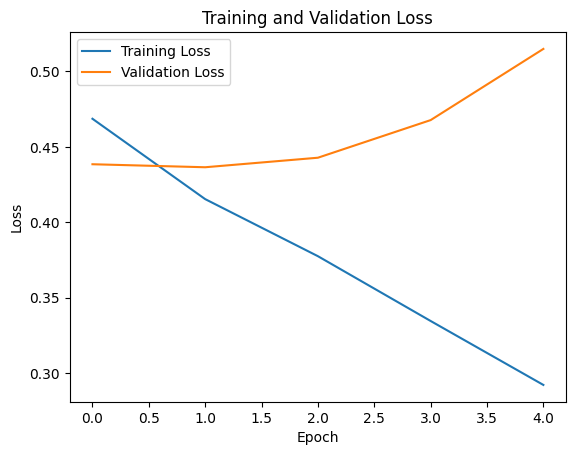

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


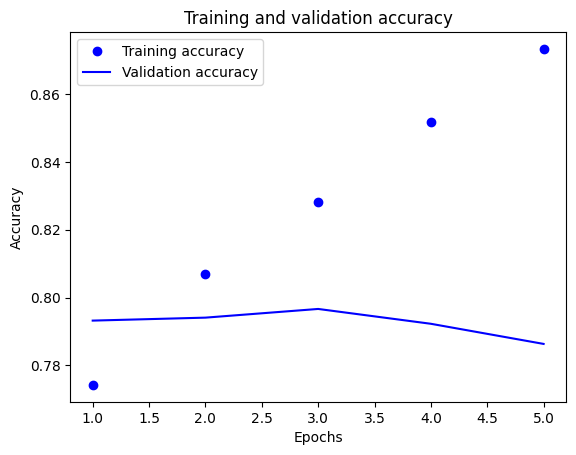

In [24]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### RNN

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to a maximum length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
epochs = 5  # Replace 10 with your desired number of training epochs
history = model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))


Epoch 1/5
4000/4000 [==============================] - 253s 63ms/step - loss: 0.4780 - accuracy: 0.7720 - val_loss: 0.4563 - val_accuracy: 0.7873
Epoch 2/5
4000/4000 [==============================] - 227s 57ms/step - loss: 0.3639 - accuracy: 0.8388 - val_loss: 0.4574 - val_accuracy: 0.7885
Epoch 3/5
4000/4000 [==============================] - 231s 58ms/step - loss: 0.2799 - accuracy: 0.8811 - val_loss: 0.4834 - val_accuracy: 0.7846
Epoch 4/5
4000/4000 [==============================] - 230s 57ms/step - loss: 0.2198 - accuracy: 0.9095 - val_loss: 0.5316 - val_accuracy: 0.7787
Epoch 5/5
4000/4000 [==============================] - 222s 56ms/step - loss: 0.1782 - accuracy: 0.9273 - val_loss: 0.6307 - val_accuracy: 0.7779


In [28]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


1000/1000 [==============================] - 7s 7ms/step - loss: 0.6307 - accuracy: 0.7779
Test Accuracy: 0.7779
